# Лабораторная работа №2. Вариант 6
Автор: Леонов Владислав  
Группа: М23-524

## ECOC coding design schemes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import classification_report


data = pd.read_csv("data/data_ml_v2-06.csv")
X = data[["x1", "x2"]]
Y = data["label"]


# le = LabelEncoder()
# y_encoded = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=55)


In [2]:
# Классификатор OVA - OneVsAll
ova_classifier = OneVsRestClassifier(GaussianNB())
ova_classifier.fit(X_train, Y_train)
ova_pred = ova_classifier.predict(X_test)
ova_accuracy = accuracy_score(Y_test, ova_pred)
print(f"OVA - точность: {ova_accuracy}")

OVA - точность: 0.7733333333333333


In [3]:
# Классификатор OVO - OneVsOne
ovo_classifier = OneVsOneClassifier(GaussianNB())
ovo_classifier.fit(X_train, Y_train)
ovo_pred = ovo_classifier.predict(X_test)
ovo_accuracy = accuracy_score(Y_test, ovo_pred)
print(f"OVO - точность: {ovo_accuracy}")

OVO - точность: 0.7533333333333333


In [4]:
# Полное бинарное кодирование
binary_classifier = OutputCodeClassifier(GaussianNB(), code_size=2, random_state=55)
binary_classifier.fit(X_train, Y_train)
binary_pred = binary_classifier.predict(X_test)
binary_accuracy = accuracy_score(Y_test, binary_pred)
print(f'Полное бинарное кодирование - точность: {binary_accuracy}')

Полное бинарное кодирование - точность: 0.68


In [5]:
# Полное тернарное кодирование
ternary_classifier = OutputCodeClassifier(GaussianNB(), code_size=3, random_state=55)
ternary_classifier.fit(X_train, Y_train)
ternary_pred = ternary_classifier.predict(X_test)
ternary_accuracy = accuracy_score(Y_test, ternary_pred)
print(f'Полное тернарное кодирование - точность: {ternary_accuracy}')

Полное тернарное кодирование - точность: 0.7533333333333333


In [6]:
# Рассчет классификационных очков OVA
unweighted_decoded_predictions_ova = ova_classifier.predict(X_test)
weighted_decoded_predictions_ova = ova_classifier.predict(X_test)

print("Оценка результатов с использованием невзвешенного ECOC-декодирования (OVA):")
print(classification_report(Y_test, unweighted_decoded_predictions_ova))
print("Оценка результатов с использованием взвешенного ECOC-декодирования (OVA):")
print(classification_report(Y_test, weighted_decoded_predictions_ova))

Оценка результатов с использованием невзвешенного ECOC-декодирования (OVA):
              precision    recall  f1-score   support

           1       0.79      0.97      0.87        34
           2       0.82      0.96      0.88        47
           3       0.67      0.60      0.63        43
           4       0.86      0.46      0.60        26

    accuracy                           0.77       150
   macro avg       0.78      0.75      0.75       150
weighted avg       0.77      0.77      0.76       150

Оценка результатов с использованием взвешенного ECOC-декодирования (OVA):
              precision    recall  f1-score   support

           1       0.79      0.97      0.87        34
           2       0.82      0.96      0.88        47
           3       0.67      0.60      0.63        43
           4       0.86      0.46      0.60        26

    accuracy                           0.77       150
   macro avg       0.78      0.75      0.75       150
weighted avg       0.77      0.77  

In [7]:
# Рассчет классификационных очков OVO
unweighted_decoded_predictions_ovo = ovo_classifier.predict(X_test)
weighted_decoded_predictions_ovo = ovo_classifier.predict(X_test)

print("Оценка результатов с использованием невзвешенного ECOC-декодирования (OVO):")
print(classification_report(Y_test, unweighted_decoded_predictions_ovo))
print("Оценка результатов с использованием взвешенного ECOC-декодирования (OVO):")
print(classification_report(Y_test, weighted_decoded_predictions_ovo))

Оценка результатов с использованием невзвешенного ECOC-декодирования (OVO):
              precision    recall  f1-score   support

           1       0.78      0.91      0.84        34
           2       0.82      0.96      0.88        47
           3       0.62      0.60      0.61        43
           4       0.85      0.42      0.56        26

    accuracy                           0.75       150
   macro avg       0.76      0.72      0.72       150
weighted avg       0.76      0.75      0.74       150

Оценка результатов с использованием взвешенного ECOC-декодирования (OVO):
              precision    recall  f1-score   support

           1       0.78      0.91      0.84        34
           2       0.82      0.96      0.88        47
           3       0.62      0.60      0.61        43
           4       0.85      0.42      0.56        26

    accuracy                           0.75       150
   macro avg       0.76      0.72      0.72       150
weighted avg       0.76      0.75  

In [8]:
# Рассчет классификационных очков 'Полное бинарное кодирование'
unweighted_decoded_predictions_binary = binary_classifier.predict(X_test)
weighted_decoded_predictions_binary = binary_classifier.predict(X_test)

print("Оценка результатов с использованием невзвешенного ECOC-декодирования (Полное бинарное кодирование):")
print(classification_report(Y_test, unweighted_decoded_predictions_binary))
print("Оценка результатов с использованием взвешенного ECOC-декодирования (Полное бинарное кодирование):")
print(classification_report(Y_test, weighted_decoded_predictions_binary))

Оценка результатов с использованием невзвешенного ECOC-декодирования (Полное бинарное кодирование):
              precision    recall  f1-score   support

           1       0.76      0.94      0.84        34
           2       0.61      1.00      0.76        47
           3       0.77      0.23      0.36        43
           4       0.72      0.50      0.59        26

    accuracy                           0.68       150
   macro avg       0.72      0.67      0.64       150
weighted avg       0.71      0.68      0.63       150

Оценка результатов с использованием взвешенного ECOC-декодирования (Полное бинарное кодирование):
              precision    recall  f1-score   support

           1       0.76      0.94      0.84        34
           2       0.61      1.00      0.76        47
           3       0.77      0.23      0.36        43
           4       0.72      0.50      0.59        26

    accuracy                           0.68       150
   macro avg       0.72      0.67      0.

In [9]:
# Рассчет классификационных очков 'Полное тернарное кодирование'

unweighted_decoded_predictions_ternary = ternary_classifier.predict(X_test)
weighted_decoded_predictions_ternary = ternary_classifier.predict(X_test)

print("Оценка результатов с использованием невзвешенного ECOC-декодирования (Полное тернарное кодирование):")
print(classification_report(Y_test, unweighted_decoded_predictions_ternary))

print("Оценка результатов с использованием взвешенного ECOC-декодирования (Полное тернарное кодирование):")
print(classification_report(Y_test, weighted_decoded_predictions_ternary))

Оценка результатов с использованием невзвешенного ECOC-декодирования (Полное тернарное кодирование):
              precision    recall  f1-score   support

           1       0.79      0.97      0.87        34
           2       0.74      0.98      0.84        47
           3       0.69      0.51      0.59        43
           4       0.86      0.46      0.60        26

    accuracy                           0.75       150
   macro avg       0.77      0.73      0.72       150
weighted avg       0.76      0.75      0.73       150

Оценка результатов с использованием взвешенного ECOC-декодирования (Полное тернарное кодирование):
              precision    recall  f1-score   support

           1       0.79      0.97      0.87        34
           2       0.74      0.98      0.84        47
           3       0.69      0.51      0.59        43
           4       0.86      0.46      0.60        26

    accuracy                           0.75       150
   macro avg       0.77      0.73      

In [10]:
def classes_graphs(classifier, x, y, title, label):
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        x,
        response_method="auto",
        plot_method="pcolormesh",
        grid_resolution=1000,
        xlabel="x1",
        ylabel="x2",
        shading="auto",
        alpha=0.5,
        ax=None,
    )

    scater = disp.ax_.scatter(
        x["x1"], x["x2"], c=y, edgecolors="k", marker=".", s = 100
    )
    disp.ax_.legend(
        *scater.legend_elements(),
        loc="lower left",
        title="Классы",
        fontsize = 'x-large'
    )

    plt.title(f"(Классификатор:{title})\nТип выборки:{label}\nДиаграммы границ классов", )
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

    plt.plot()

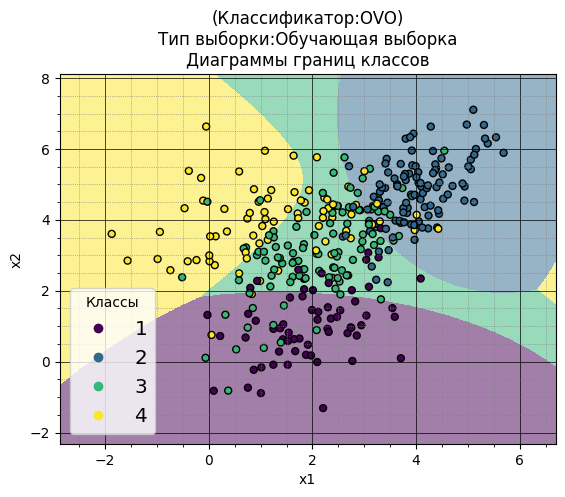

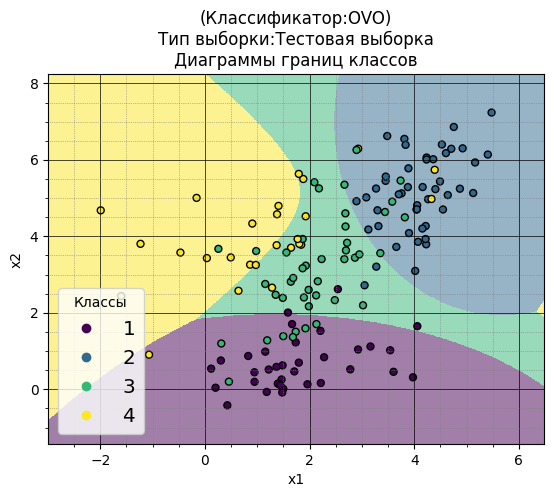

In [11]:
classes_graphs(ovo_classifier, X_train, Y_train, 'OVO', 'Обучающая выборка')
classes_graphs(ovo_classifier, X_test, Y_test, 'OVO', 'Тестовая выборка')

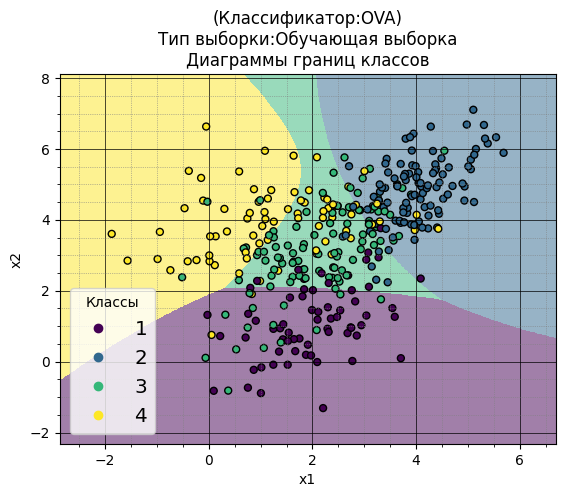

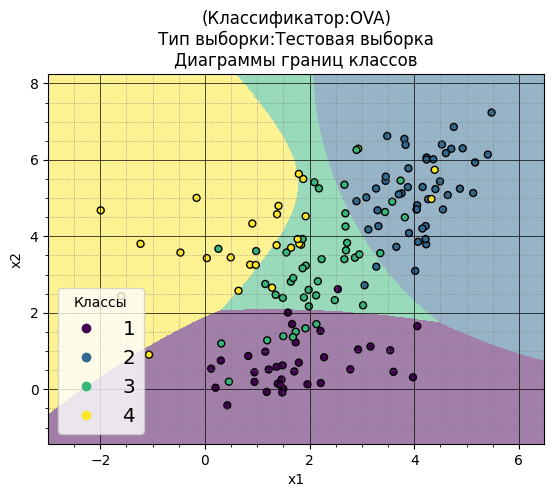

In [12]:
classes_graphs(ova_classifier, X_train, Y_train, 'OVA', 'Обучающая выборка')
classes_graphs(ova_classifier, X_test, Y_test, 'OVA', 'Тестовая выборка')

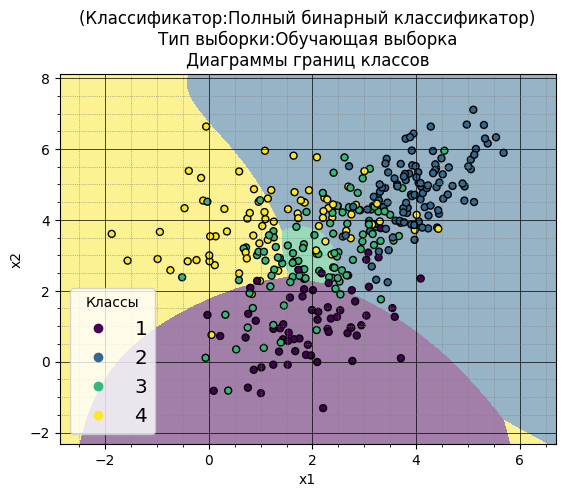

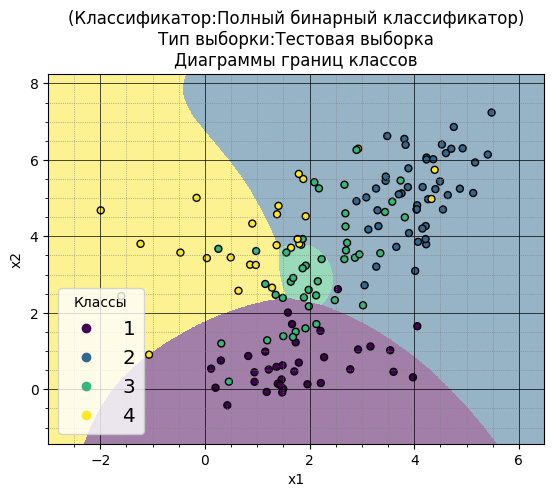

In [13]:
classes_graphs(binary_classifier, X_train, Y_train, 'Полный бинарный классификатор', 'Обучающая выборка')
classes_graphs(binary_classifier, X_test, Y_test, 'Полный бинарный классификатор', 'Тестовая выборка')

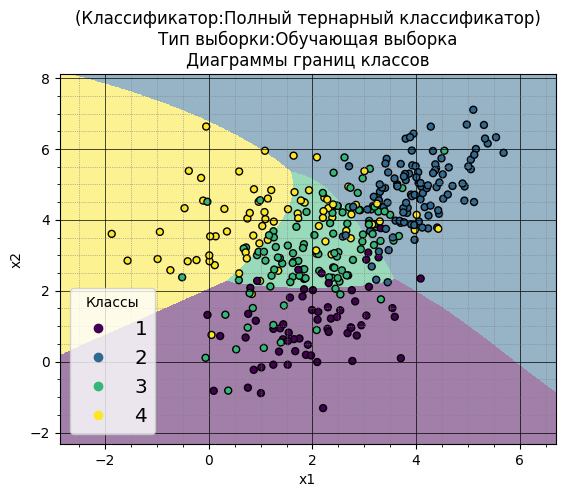

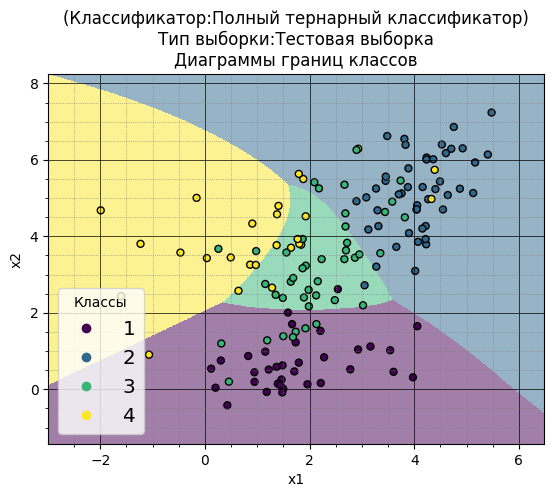

In [14]:
classes_graphs(ternary_classifier, X_train, Y_train, 'Полный тернарный классификатор', 'Обучающая выборка')
classes_graphs(ternary_classifier, X_test, Y_test, 'Полный тернарный классификатор', 'Тестовая выборка')


In [15]:
def accuracy_bars(classifiers, x_train, y_train, x_test, y_test):
    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(1, 2, 1)
    accuracies = [accuracy_score(y_train, clf.predict(x_train)) for clf in classifiers]
    plt.bar([0, 1, 2, 3], accuracies, width=0.4, align="center", color = 'blue', edgecolor = 'black', alpha=0.7, label='Обучающая выборка')
    plt.xlabel("Классификаторы")
    plt.ylabel("Точность")
    plt.title(f"Сравнение точностей построенных классификаторов\nТип выборки: Обучающая")
    plt.xticks([0, 1, 2, 3], ["OVA", "OVO", "Бинарный", "Тернарный"])
    plt.legend()
    plt.minorticks_on()

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    accuracies = [accuracy_score(y_test, clf.predict(x_test)) for clf in classifiers]
    plt.bar([0, 1, 2, 3], accuracies, width=0.4, align="center", color = 'red', edgecolor = 'black', alpha=0.7, label='Тестовая выборка')
    plt.xlabel("Классификаторы")
    plt.ylabel("Точность")
    plt.title(f"Сравнение точностей построенных классификаторов\nТип выборки: Тестовая")
    plt.xticks([0, 1, 2, 3], ["OVA", "OVO", "Бинарный", "Тернарный"])
    plt.legend()
    plt.minorticks_on()

    plt.show()

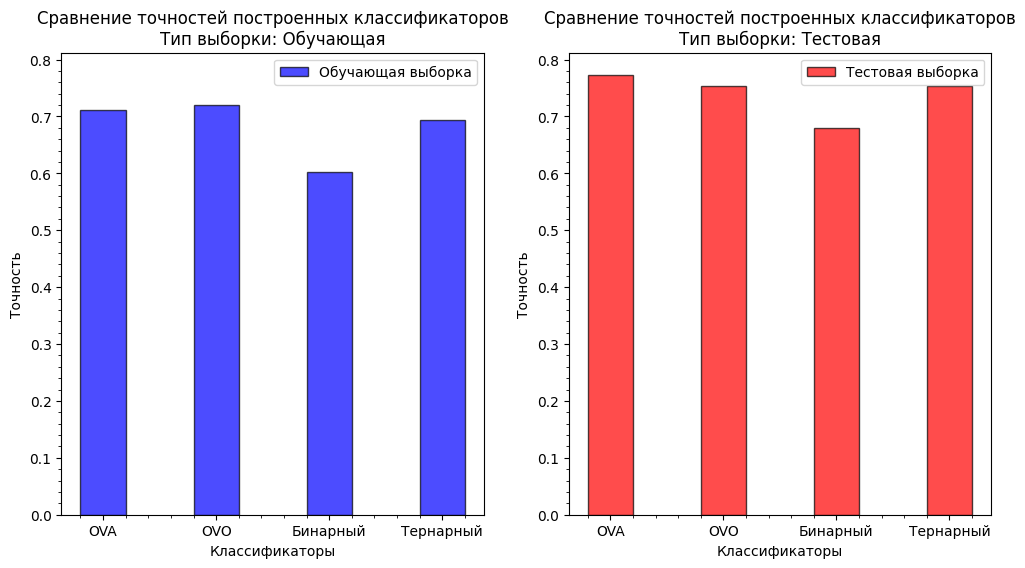

In [16]:
accuracy_bars(
    [ova_classifier, ovo_classifier, binary_classifier, ternary_classifier],
    X_train,
    Y_train,
    X_test,
    Y_test,
)